<a href="https://colab.research.google.com/github/annatutuuu/3D-phase-portrait/blob/main/line-random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segments 2 and 3 intersect at [2.84210526 3.10526316].
Segments 2 and 4 intersect at [4.18181818 3.27272727].
Segments 2 and 5 intersect at [3.14285714 3.14285714].
Segments 3 and 4 intersect at [2.66666667 2.66666667].


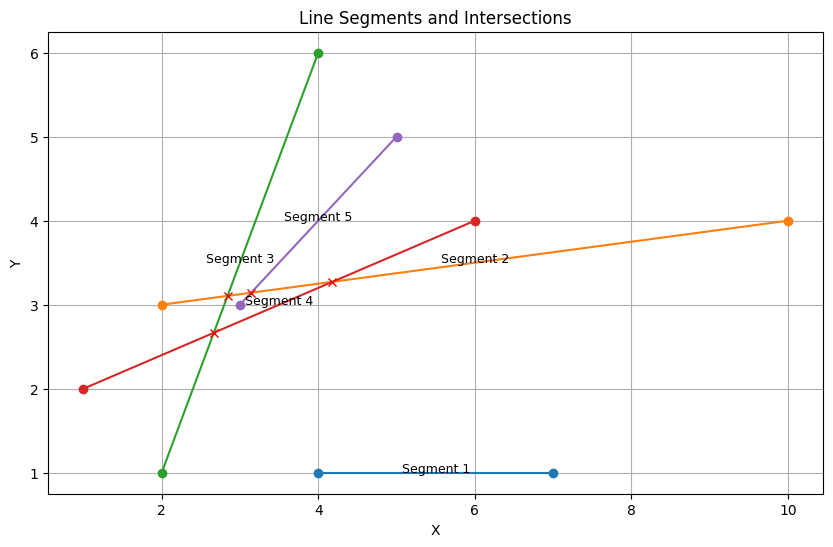

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def on_segment(p, q, r):
    if (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
            q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1])):
        return True
    return False

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0: return 0  # collinear
    return 1 if val > 0 else 2  # clock or counterclockwise

def do_intersect(s1, s2):
    p1, q1 = s1
    p2, q2 = s2
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
    if o1 != o2 and o3 != o4: return True
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True
    return False

def get_intersection_point(s1, s2):
    p1, q1 = s1
    p2, q2 = s2
    A1 = q1[1] - p1[1]
    B1 = p1[0] - q1[0]
    C1 = A1 * p1[0] + B1 * p1[1]
    A2 = q2[1] - p2[1]
    B2 = p2[0] - q2[0]
    C2 = A2 * p2[0] + B2 * p2[1]
    matrix_A = np.array([[A1, B1], [A2, B2]])
    matrix_C = np.array([C1, C2])
    if np.linalg.det(matrix_A) != 0:
        intersection = np.linalg.solve(matrix_A, matrix_C)
        if on_segment(p1, intersection, q1) and on_segment(p2, intersection, q2):
            return intersection
    return None

def is_intersect_with_points(segments):
    intersections = []
    for i in range(len(segments)):
        for j in range(i + 1, len(segments)):
            if do_intersect(segments[i], segments[j]):
                intersection = get_intersection_point(segments[i], segments[j])
                if intersection is not None:
                    print(f"Segments {i + 1} and {j + 1} intersect at {intersection}.")
                    intersections.append(intersection)
    return intersections

# Generate random segments
num_segments = 5
segments = []
for _ in range(num_segments):
    x1, y1 = random.randint(1, 10), random.randint(1, 10)
    x2, y2 = random.randint(1, 10), random.randint(1, 10)
    segments.append((np.array([x1, y1]), np.array([x2, y2])))

# Plotting
plt.figure(figsize=(10, 6))
for i, s in enumerate(segments):
    plt.plot([s[0][0], s[1][0]], [s[0][1], s[1][1]], marker='o')
    midpoint = (s[0] + s[1]) / 2
    plt.text(midpoint[0], midpoint[1], f'Segment {i+1}', fontsize=9, ha='center')

intersection_points = is_intersect_with_points(segments)
for point in intersection_points:
    plt.plot(point[0], point[1], 'rx')  # Mark intersection points with red 'x'

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Segments and Intersections')
plt.grid(True)
plt.show()